### 목표 설정
- 버섯의 특징을 활용해 독/식용 버섯 분류
- 의사결정나무 시각화 & 과대적합 속성 제어(하이퍼 파라미터 설정)
- 특성선택 해보기

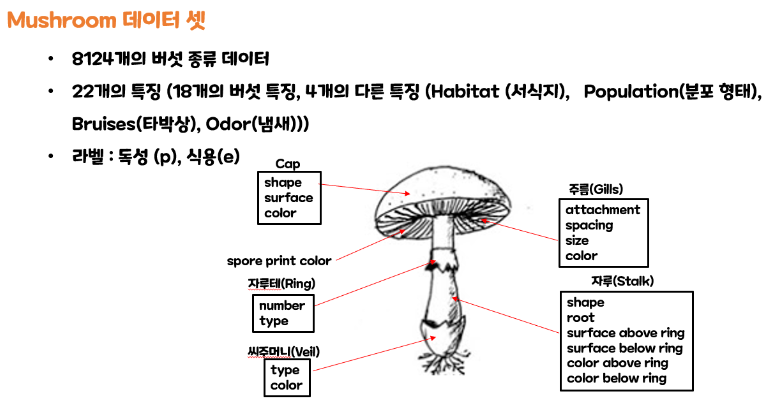

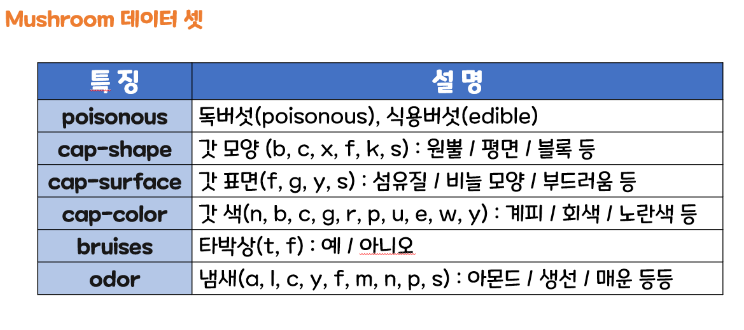

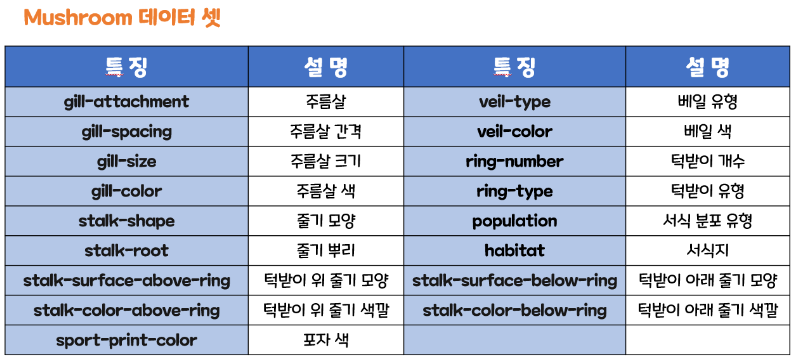

In [224]:
# 필요한 라이브러리 불러오기
# 1. pandas
import pandas as pd
# 2. train_test_split
from sklearn.model_selection import train_test_split

In [225]:
# 데이터 셋 불러오기
data = pd.read_csv('./data/mushroom.csv')

In [226]:
# 데이터 확인해보기
data.head(1)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u


In [227]:
# 전체 컬럼 표시하기
pd.set_option('display.max_columns' ,None)

In [228]:
data.head(1)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u


In [229]:
# 결측치 유무 확인하기 - info()
# info() - 데이터 프레임에 대한 간략한 정보 제공
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 문제와 정답 분리

In [230]:
X = data.loc[:,'cap-shape':]
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [231]:
# label : 'poisonous'
y = data['poisonous']
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

In [232]:
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [233]:
# 정답의 분포 확인(독버섯/식용버섯 몇개 ?)
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

### ont-hot Encoding(원 핫 인코딩)

In [234]:
X_one_hot = pd.get_dummies(X)

In [235]:
X_one_hot.head(1)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


- 원 핫 인코딩 : 값의 크고 작음이 의미가 없을 때 수치화 시켜주는 방법
- 라벨 인코딩보다 상대적으로 많이 사용
- 분류하고자 하는 범주(종류)만큼 자릿수를 만들고 단 한개의 1과 나머지 0으로 채워서 숫자화 하는 방법

### 추가 설명) label Encoding

In [236]:
# unique() : 데이터의 고유값을 확인하는 함수
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [237]:
# 데이터 딕셔너리화
habitat_dic =  {
    'u' : 1,
    'g' : 2,
    'm' : 3,
    'd' : 4,
    'p' : 5,
    'w' : 6,
    'l' : 7
}
X['habitat'].map(habitat_dic)

0       1
1       2
2       3
3       1
4       2
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

- 라벨인코딩보다 원핫인코딩을 더 많이 사용하는 이유
    - 숫자는 기본적으로 크기라는 개념을 가지고 있다.
    - 크기라는 개념이 모델학습에 영향을 줄 수 있다. 그래서 크기라는 개념이 없는 원핫인코딩을 더 많이 사용
    - 주의) 회귀에서는 라벨인코딩을 사용하지 않는다.  

### 데이터 분할(훈련셋 / 평가셋)
- train_test_split을 이용해서 데이터 셋을 분할해보자

In [238]:
# train_test_split 사용하기(평가셋은 30%, 랜덤 시드값은 7)
X_train, X_test, y_train, y_test = train_test_split(X_one_hot,y,test_size=0.3,random_state=7)

In [239]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5686, 117)
(2438, 117)
(5686,)
(2438,)


In [240]:
# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

In [241]:
# 모델 객체 생성
tree = DecisionTreeClassifier()

In [242]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

### 의사 결정 나무 모델 시각화

In [243]:
# graphviz 설치 방법
# anaconda prompt -> pip install graphviz, conda install graphviz 설치
# 파있너 루프폴더 찾아가서 anaconda3 들어가기
# anaconda3 -> Library -> include -> graphviz 폴더 복사하기
# 다시 anaconda3로 돌아와서 Lib -> site-packages 폴더 안에 붙여 넣어주기

In [244]:
import graphviz

In [245]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot',
                class_names=['독','식용'],
                feature_names=X_one_hot.columns,
                impurity=False, # 지니 불순도 표시 유무
                filled=True) # 트리내부에 색상을 채워줄 것인가 ?

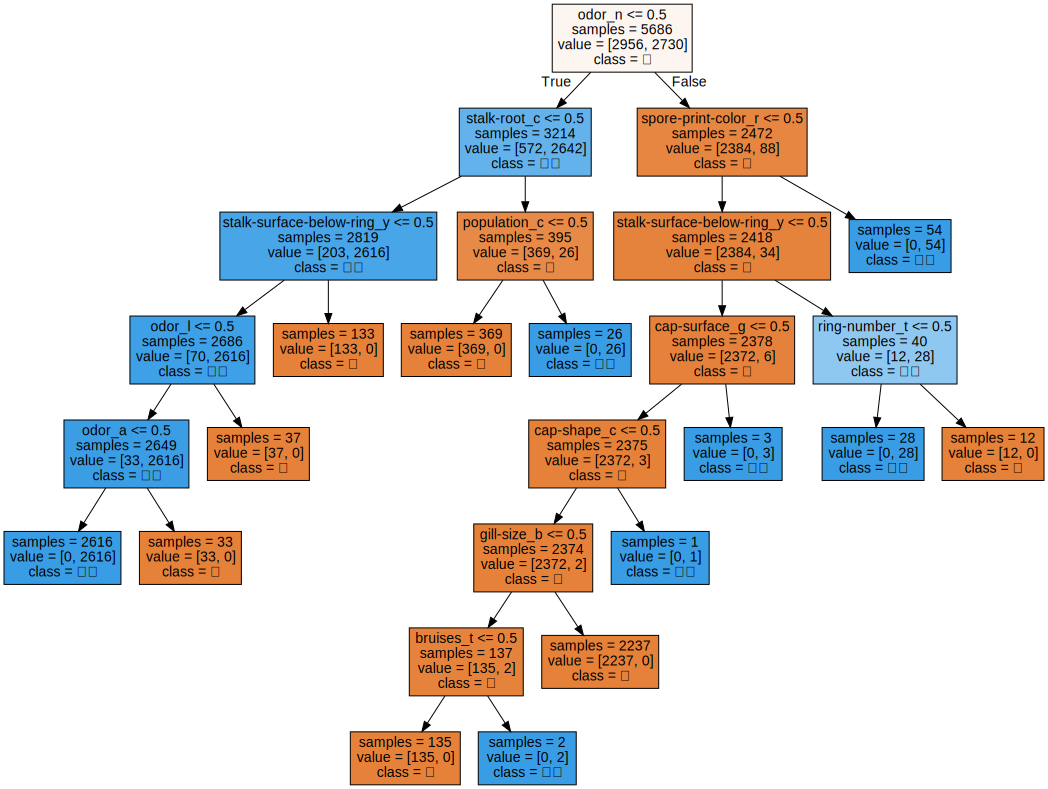

In [246]:
# 파일 불러와서 시각화 작업하기
with open('tree.dot', encoding='UTF8') as f :
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### 평가
- 교차검증을 언제 사용하는지 -> 평가 단계에서 train score 대신 확인할 수 있음
- 앞으로는 평가단계에서  
    cross_val_score(tree,
                X_one_hot,
                y,
                cv= 5)로 확인

In [247]:
# tree 모델 평가하기
tree.score(X_train,y_train)

1.0

In [248]:
tree.score(X_test,y_test)

1.0

### 하이퍼 파라미터 조정(트리의 복잡도를 제어)
- 의사결정나무는 기본모델을 사용할 시 모든 값을 완벽하게 분할하려는 특성을 가지고 있다
- 위의 특성때문에 과대적합에 약한 모습을 보인다 (과대적합이 자주 일어난다)
- 그래서 트리의 하이퍼 파라미터를 조정해서 트리가 복잡해지지 않도록 적절한 값을 넣어줘야한다

In [249]:
# max_depth : 트리의 깊이 조정
tree2 = DecisionTreeClassifier(max_depth=4)
tree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

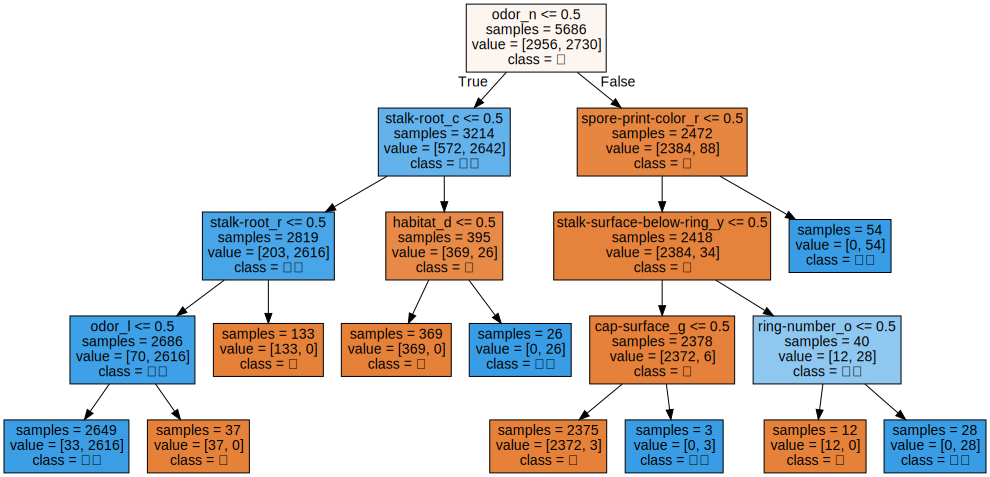

In [250]:
export_graphviz(tree2, out_file='tree2.dot',
                class_names=['독','식용'],
                feature_names=X_one_hot.columns,
                impurity=False, # 지니 불순도 표시 유무
                filled=True) # 트리내부에 색상을 채워줄 것인가 ?

with open('tree2.dot', encoding='UTF8') as f :
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [251]:
cross_val_score(tree2,
                X_one_hot,
                y,
                cv= 5)

array([1.        , 0.99446154, 0.98830769, 1.        , 0.82081281])

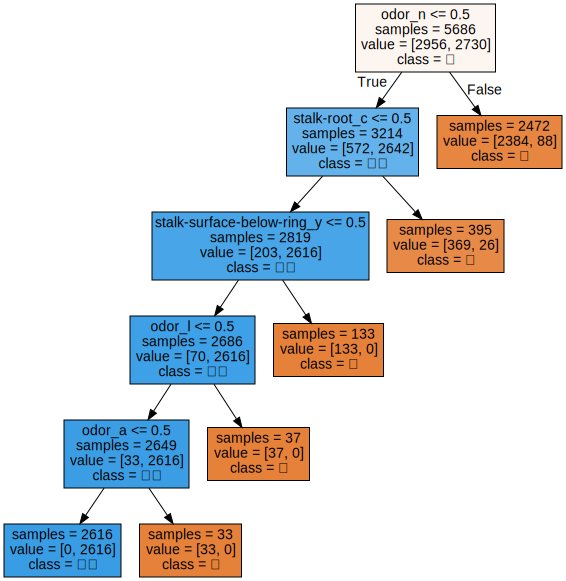

In [252]:
# min_samples_split : 노드로 분할 가능한 최소 샘플 수
tree2 = DecisionTreeClassifier(min_samples_split=2500)
tree2.fit(X_train,y_train)

export_graphviz(tree2, out_file='tree2.dot',
                class_names=['독','식용'],
                feature_names=X_one_hot.columns,
                impurity=False, # 지니 불순도 표시 유무
                filled=True) # 트리내부에 색상을 채워줄 것인가 ?

with open('tree2.dot', encoding='UTF8') as f :
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [253]:
cross_val_score(tree2,
                X_one_hot,
                y,
                cv= 5)

array([1.        , 0.99938462, 0.83753846, 0.99876923, 0.62561576])

### 교차 검증
- 훈련과 평가를 여러번 진행하면서 검증의 효과를 얻기 위한 방법
- 전체 데이터가 축소되지 않기 때문에 적은 데이터에서도 효과를 얻을 수 있음

In [254]:
# 교차검증을 위한 라이브러리 불러오기
from sklearn.model_selection import cross_val_score
# 사용할 모델, 문제 데이터, 정답 데이터, 데이터 분할 수(cv)
# 데이터를 훈련과 평가로 나누어주기 때문에 문제와 정답으로 분리한 데이터 사용
# cv = 5 : 학습, 결과가 5번 출력
cross_val_score(tree,
                X_one_hot,
                y,
                cv= 5)

array([1.        , 1.        , 0.99630769, 1.        , 0.98522167])

In [255]:
# 검증을 확인할 필요가 있음
# 보통 mean() 함수를 사용
cross_val_score(tree,
                X_one_hot,
                y,
                cv= 5).mean()
# 기존 완벽한 1이 아닌 교차검증을 해보니 0.996정도가 나옴을 확인

0.9371925729442971

### 특성 선택

- tree 모델이 판별한 특성 중요도 확인
- 데이터가 엄청 많아지게 되면 데이터를 줄여야 함
    - 1. 학습량이 늘어나서 시간이 많이 소요
    - 2. 쓸데없는 데이터가 발생  
        (독성인지 식용인지 판별하는데 도움이 안되는 데이터)  
        -> 불필요한 계산이나 시간 소요
- 목적 : 쓸모있는 데이터만 남기자

In [256]:
fi = tree.feature_importances_
fi

array([0.00000000e+00, 7.03112501e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10578942e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.38861859e-03, 2.29619887e-02, 0.00000000e+00,
       0.00000000e+00, 2.50743114e-02, 0.00000000e+00, 6.08901883e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.93849405e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.81454492e-01, 0.00000000e+00, 0.00000000e+00,
      

In [262]:
# 데이터 프레임화 시키기
importance_df = pd.DataFrame(fi, index=X_one_hot.columns)
importance_df.sort_values(by=0, ascending=False) # 내림차순
# 0의 이름을 갖는 컬럼을 기준으로 내림차순을 정렬
# 전체 특성이 117 컬럼

,0
odor_n,0.608902
stalk-root_c,0.181454
stalk-surface-below-ring_y,0.098180
spore-print-color_r,0.036178
odor_l,0.025074
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000


In [263]:
# 중요도가 0인 것을 제외하고 확인
importance_df[importance_df[0] != 0]

,0
cap-shape_c,0.000703
cap-surface_g,0.002106
bruises_t,0.001389
odor_a,0.022962
odor_l,0.025074
odor_n,0.608902
gill-size_b,0.000019
stalk-root_c,0.181454
stalk-surface-below-ring_y,0.098180
ring-number_t,0.005919


- tree 모델 내부에서 시각화 표를 확인했을 때 가장 중요도가 높은  
odor_n 컬럼을 우선 고려해서 분류한 것을 확인
- 중요도가 가장 높은 컬럼(정답을 분류해내는데 가장 많은 영향을 주고 중요한)을  
 먼저 고려해야 가장 효율적으로 분류할 수 있기 때문
- 현재 버섯데이터는 odor_n 컬럼이 60% 이상의 중요도를 혼자 차지하고 있다  
 -> 모델이 학습하기 쉬운 데이터, 100% 정확도를 쉽게 얻어낼 수 있음 -> 실전데이터는 더 어렵다